In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
df = pd.read_csv("data-tsne/PQQ-basic-descriptors.csv")
df

,WP:3844,GO:0000165,GO:0004896,KEGG:hsa04064,KEGG:hsa04210,KEGG:hsa04630,GO:0016209,GO:0098869,GO:0072593,GO:0006281,...,TPSA,NumHDonors,NumHAcceptors,NumRotatableBonds,FractionCSP3,NumAromaticRings,MaxPartialCharge,MinPartialCharge,NumNitrogen,NumOxygen
0,1,0,0,0,0,0,1,0,0,0,...,83.05,2,3,2,0.000000,3,0.335934,-0.477622,2,3
1,1,0,0,0,0,0,1,0,0,0,...,97.33,2,5,4,0.187500,3,0.337537,-0.496740,3,4
2,1,0,0,0,0,0,0,0,0,0,...,115.79,2,7,7,0.173913,4,0.336099,-0.496768,3,6
3,1,0,0,0,0,0,0,0,0,0,...,108.67,2,7,3,0.222222,3,0.354063,-0.507943,4,4
4,1,0,0,0,0,0,0,0,0,0,...,108.67,2,7,3,0.263158,3,0.354018,-0.507943,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11519,0,0,0,0,1,0,0,0,0,0,...,46.15,0,5,1,1.000000,0,0.201282,-0.355475,0,5
11520,0,0,0,0,1,0,0,0,0,0,...,23.79,0,2,0,0.000000,0,1.000000,-0.695798,1,0
11521,0,0,0,0,1,0,0,0,0,0,...,26.02,1,1,0,1.000000,0,0.016184,-0.325030,1,0
11522,0,0,0,0,1,0,1,0,0,0,...,64.07,3,3,7,1.000000,0,-0.003690,-0.330473,3,0


In [4]:
df_candidates = pd.read_csv("data-tsne/merged_result_with_descriptors.csv")
df_candidates

,cid,ExactMolWt,MolLogP,TPSA,NumHDonors,NumHAcceptors,NumRotatableBonds,FractionCSP3,NumAromaticRings,MaxPartialCharge,MinPartialCharge,NumNitrogen,NumOxygen,BBB,WP:3844,GO:0000165,GO:0004896,KEGG:hsa04064,KEGG:hsa04210,KEGG:hsa04630
0,19,154.026609,0.7960,77.76,3,3,1,0.000000,1,0.339119,-0.504241,0,4,0,0,0,1,1,1,0
1,127,152.047344,1.0193,57.53,2,2,2,0.125000,1,0.307315,-0.507967,0,3,0,0,0,0,1,1,0
2,177,44.026215,0.2052,17.07,0,1,0,0.500000,0,0.116405,-0.303715,0,1,0,0,0,0,1,1,0
3,247,117.078979,-1.5575,40.13,0,2,2,0.800000,0,0.118312,-0.544116,1,2,0,0,0,0,1,1,0
4,264,88.052430,0.8711,37.30,1,1,2,0.750000,0,0.302829,-0.481231,0,2,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,157009725,625.155182,2.3605,227.13,8,13,8,0.225806,4,0.402050,-0.507966,0,14,1,0,0,0,1,1,0
204,157009726,655.165747,2.3691,236.36,8,14,9,0.250000,4,0.402051,-0.507450,0,15,1,0,0,0,1,1,0
205,157009736,784.206208,-2.1897,334.42,11,20,9,0.529412,3,0.505354,-0.507966,0,21,1,0,0,1,1,1,0
206,157009738,922.184444,-4.5075,479.23,15,19,28,0.424242,1,0.347974,-0.503458,6,21,1,0,0,0,0,1,0


In [5]:
tophitslist = [72281, 1024, 443023, 5318645, 14353459, 21674154, 44257035, 57397583, 101422354, 101746085, 102157736, 102470786]
len(tophitslist)

12

In [6]:
df_tophits = df_candidates[df_candidates["cid"].isin(tophitslist)]
df_tophits

,cid,ExactMolWt,MolLogP,TPSA,NumHDonors,NumHAcceptors,NumRotatableBonds,FractionCSP3,NumAromaticRings,MaxPartialCharge,MinPartialCharge,NumNitrogen,NumOxygen,BBB,WP:3844,GO:0000165,GO:0004896,KEGG:hsa04064,KEGG:hsa04210,KEGG:hsa04630
19,1024,330.012415,0.5503,174.72,4,6,3,0.000000,2,0.354034,-0.477621,2,8,1,0,0,0,0,1,1
79,72281,302.079038,2.5185,96.22,3,6,2,0.187500,2,0.173909,-0.507679,0,6,1,1,1,1,1,1,0
107,443023,418.162768,3.2074,95.84,2,8,6,0.454545,2,0.200254,-0.501699,0,8,1,0,1,1,1,1,0
156,5318645,478.111126,-0.2359,199.51,7,12,5,0.318182,3,0.238633,-0.507678,0,12,1,0,1,1,1,1,0
175,14353459,652.163950,-1.4674,275.50,9,17,7,0.448276,3,0.302220,-0.506890,0,17,1,0,1,1,1,1,0
179,21674154,625.155182,1.8303,226.21,7,13,7,0.258065,5,0.347080,-0.504260,0,14,1,0,0,1,1,1,0
182,44257035,609.160267,2.1247,205.98,6,12,7,0.258065,5,0.347080,-0.507966,0,13,1,0,0,1,1,1,0
187,57397583,740.216379,-2.8920,308.12,11,19,8,0.545455,3,0.238633,-0.507966,0,19,1,0,1,1,1,1,0
192,101422354,578.163556,-1.0983,228.97,8,14,6,0.444444,3,0.234534,-0.507966,0,14,1,0,1,1,1,1,0
193,101746085,568.179206,-1.7391,236.06,9,14,10,0.500000,2,0.229175,-0.507967,0,14,1,0,1,1,1,1,0


In [7]:
feats = ['ExactMolWt', 'MolLogP', 'TPSA', 'NumHDonors', 'NumHAcceptors', 'NumRotatableBonds',
            'FractionCSP3', 'NumAromaticRings', 'MaxPartialCharge', 'MinPartialCharge',
            'NumNitrogen', 'NumOxygen']
targets = ['WP:3844', 'GO:0000165', 'GO:0004896', 'KEGG:hsa04064', 'KEGG:hsa04210', 'KEGG:hsa04630']

In [8]:
channel = 'GO:0000165'
features = df[feats].values
candidates_data = df_candidates[feats].values
tophits_data = df_tophits[feats].values

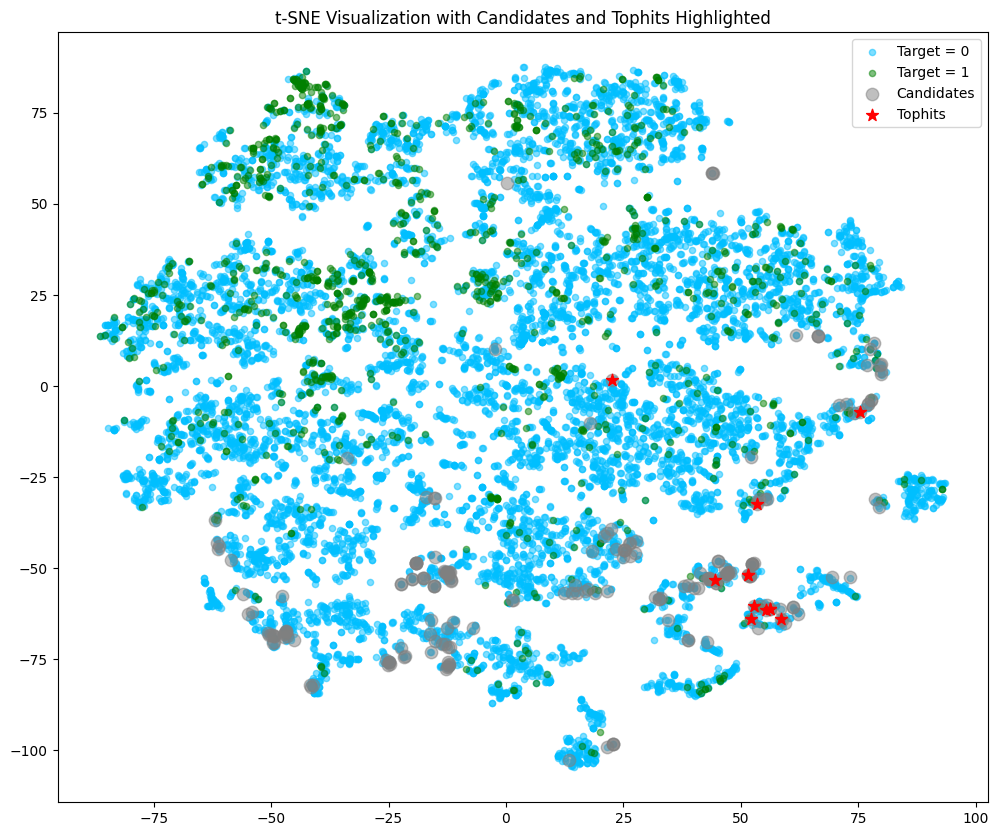

In [9]:
colors_data = df[channel].values
colors_candidates = np.repeat(2, len(candidates_data))  # 为candidates分配颜色标签2
colors_tophits = np.repeat(3, len(tophits_data))  # 为tophits分配颜色标签3
colors = np.concatenate([colors_data, colors_candidates, colors_tophits])

# Preprocessing
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
candidates_data_scaled = scaler.transform(candidates_data)
tophits_data_scaled = scaler.transform(tophits_data)

# Combining the data, candidates data, and tophits data for joint PCA and t-SNE processing
combined_data = np.vstack((features_scaled, candidates_data_scaled, tophits_data_scaled))

# PCA dimensionality reduction
pca = PCA(n_components=10)
combined_data_pca = pca.fit_transform(combined_data)

# t-SNE dimensionality reduction
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
combined_data_tsne = tsne.fit_transform(combined_data_pca)

# Visualization
plt.figure(figsize=(12, 10))

# Scatter plots for the data, candidates, and tophits
scatter0 = plt.scatter(combined_data_tsne[colors == 0, 0], combined_data_tsne[colors == 0, 1], c='#00BFFF', alpha=0.5, s=20, label='Target = 0')
scatter1 = plt.scatter(combined_data_tsne[colors == 1, 0], combined_data_tsne[colors == 1, 1], c='green', alpha=0.5, s=20, label='Target = 1')
scatter_candidates = plt.scatter(combined_data_tsne[colors == 2, 0], combined_data_tsne[colors == 2, 1], c='gray', alpha=0.5, s=80, label='Candidates')
scatter_tophits = plt.scatter(combined_data_tsne[colors == 3, 0], combined_data_tsne[colors == 3, 1], c='red', marker='*', s=80, label='Tophits')

# Legend
plt.legend(handles=[scatter0, scatter1, scatter_candidates, scatter_tophits])
plt.title("t-SNE Visualization with Candidates and Tophits Highlighted")
plt.show()